In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline

Regression Analysis: Seasonal Effects with Sklearn Linear Regression

In [3]:
#Read in the dataset 

yen_futures = pd.read_csv("yen.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)

yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2,1
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0,1
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0,1
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0,1
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0,1


In [4]:
#Trim the dataset to begin on January 1st, 1990 

yen_futures = yen_futures.loc["1990-01-01":, :]
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336,51473
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206,53860
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649,55699
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944,53111
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763,52072


In [11]:
# Create a series using "Settle" price percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
returns = (yen_futures[["Settle"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

yen_futures["Return"] = returns
yen_futures = yen_futures.dropna()
yen_futures.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return
Date,,,,,,,,,
2019-10-09,9381.0,9391.5,9330.5,9343.5,38.5,9338.0,99153,145470,-0.410601
2019-10-10,9343.5,9380.5,9293.5,9301.0,34.5,9303.5,159397,144474,-0.369458
2019-10-11,9308.5,9309.0,9240.0,9267.0,52.5,9251.0,158810,147471,-0.564304
2019-10-14,9259.0,9292.0,9250.5,9261.0,14.0,9265.0,69457,153902,0.151335
2019-10-15,9264.5,9280.0,9216.5,9220.0,43.5,9221.5,108342,151564,-0.469509


Lagged Returns

In [12]:
#Create a lagged return using the shift function 

yen_futures['Lagged_Return'] = returns.shift()
# Drop NaN values
yen_futures = yen_futures.dropna()
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return,Lagged_Return
Date,,,,,,,,,,
2014-02-21,9772.0,9776.0,9725.0,9758.0,20.0,9755.0,103091,202990,-0.204604,0.020465
2014-02-24,9752.0,9789.0,9740.0,9757.0,2.0,9757.0,90654,203114,0.020502,-0.204604
2014-02-25,9760.0,9808.0,9744.0,9789.0,32.0,9789.0,105498,201486,0.327970,0.020502
2014-02-26,9784.0,9795.0,9746.0,9760.0,29.0,9760.0,118559,200105,-0.296251,0.327970
2014-02-27,9769.0,9831.0,9762.0,9798.0,38.0,9798.0,160638,201246,0.389344,-0.296251


Train Test Split

In [13]:
# Create a train/test splot for the data using 2018 - 2019 for testing and the rest for training 

train = yen_futures[:'2017']
test = yen_futures["2018":]

In [19]:
# Create four dataframes:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):

X_train = train["Lagged_Return"].to_frame()
X_test = test["Lagged_Return"].to_frame()
Y_train = train["Return"]
y_test = test["Return"]

In [20]:
X_train

,Lagged_Return
Date,
2014-02-21,0.020465
2014-02-24,-0.204604
2014-02-25,0.020502
2014-02-26,0.327970
2014-02-27,-0.296251
...,...
2017-12-22,0.084621
2017-12-26,0.118370
2017-12-27,0.118230


Linear Regression Model

In [21]:
 # Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

In [22]:
# Fit a SKLearn linear regression using just the training set (X_train, Y_train):

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

Make predictions using the Testing Data 

Note: We want to evaluate the model using data that it has never seen before, in this case: X_test

In [24]:
 # And make a prediction of "y" values for just the test dataset
predictions = model.predict(X_test)

In [25]:
 # Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results["Predicted Return"] = predictions

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

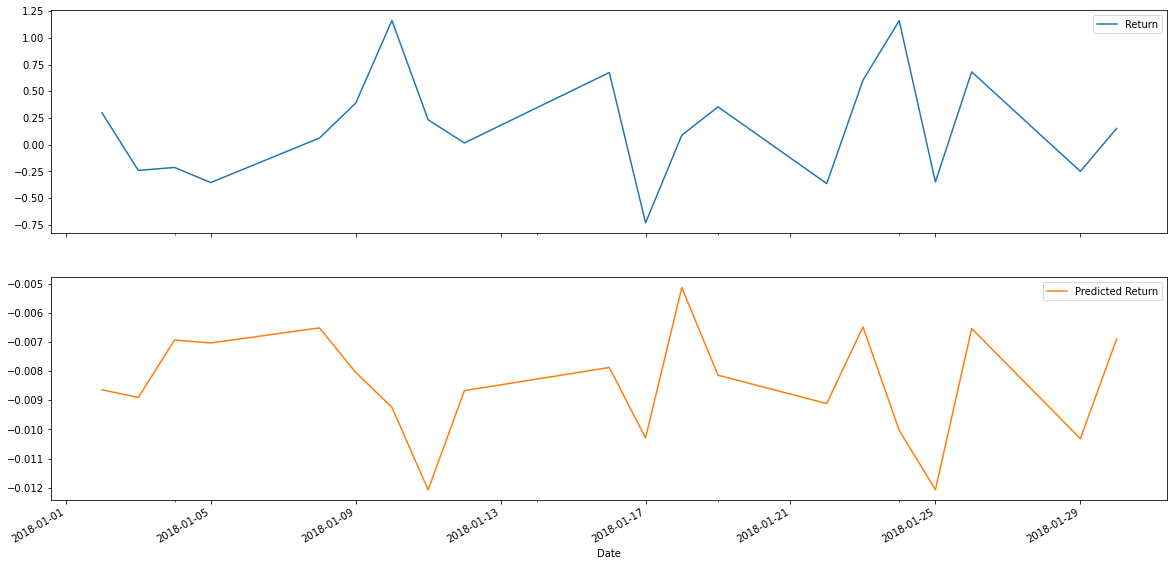

In [28]:
# Plot the first 20 predictions vs the true values
Results[:20].plot(subplots=True, figsize=(20,10))

Out-of-Sample Performance

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

#Calculate the mean_square_error (MSE) on actual vs predicted test "y"

mse = mean_squared_error(
    Results["Return"],
    Results["Predicted Return"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 0.4154834983842043


In-Sample Performance 

In [31]:
# Construct a dataframe using just the "y" training data:
in_sample_results = y_train.to_frame()

# Add a column of "in-sample" predictions to that dataframe:  
in_sample_results["In-sample Predictions"] = model.predict(X_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(
    in_sample_results["Return"],
    in_sample_results["In-sample Predictions"]
)


# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = np.sqrt(in_sample_mse)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")




In-sample Root Mean Squared Error (RMSE): 0.5969835285643179


Conclusions

A: Not robust as root mean squared error is materially off the confidence interval